In [5]:
import pandas as pd
dataset_path = '../data/train.csv'
data = pd.read_csv(dataset_path)
print(data.head()) #head会调用前五行

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
# 输出数据集的行数和列数
num_rows, num_cols = data.shape
print("数据集行数:", num_rows)
print("数据集列数:", num_cols)
# 输出数据集的基本信息
print("\n数据集的基本信息：")
print(data.info())

数据集行数: 891
数据集列数: 12

数据集的基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# 检查每列的缺失值数量
missing_values = data.isnull().sum()
print("\n缺失值数量：")
print(missing_values)


缺失值数量：
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


基于Sex或Pclass来填充不同组别的年龄均值，以提高填充的精确度。

In [8]:
#缺失信息补全
data['Age'] = data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean())) #填充Age
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # 填充Embarked

In [9]:
data['date'] = 19120410
data['date'] = pd.to_datetime(data['date']) 

In [10]:
# 提取Title
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# 年龄组
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
# 票价组
data['FareGroup'] = pd.cut(data['Fare'], bins=[0, 10, 50, 100, 500], labels=['Low', 'Medium', 'High', 'VeryHigh'])


In [11]:
print("处理后的数据集信息：")
print(data.info())

处理后的数据集信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PassengerId  891 non-null    int64         
 1   Survived     891 non-null    int64         
 2   Pclass       891 non-null    int64         
 3   Name         891 non-null    object        
 4   Sex          891 non-null    object        
 5   Age          891 non-null    float64       
 6   SibSp        891 non-null    int64         
 7   Parch        891 non-null    int64         
 8   Ticket       891 non-null    object        
 9   Fare         891 non-null    float64       
 10  Cabin        204 non-null    object        
 11  Embarked     891 non-null    object        
 12  date         891 non-null    datetime64[ns]
 13  Title        891 non-null    object        
 14  AgeGroup     891 non-null    category      
 15  FareGroup    873 non-null    category      
dt

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

palette = sns.color_palette("Set2", 6) 

不同性别的生存数量

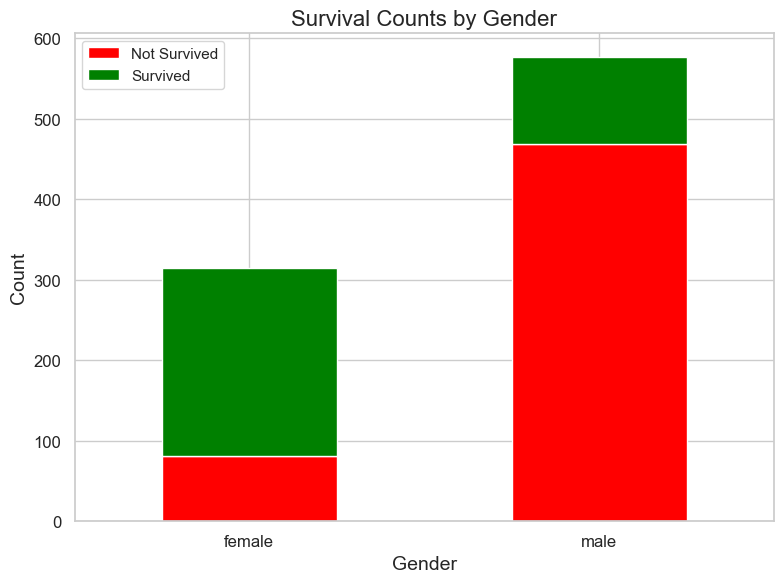

In [13]:
#统计不同性别的生存数量
gender_survived = data.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
gender_survived.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Counts by Gender')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper left')
plt.tight_layout()
plt.show()


 不同舱位等级的乘客年龄分布

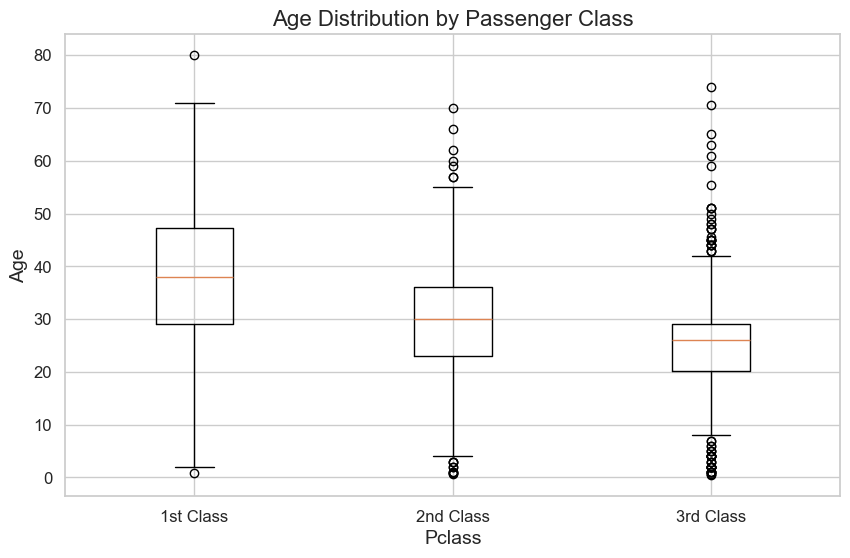

In [14]:
 # 使用箱线图比较不同舱位等级的乘客年龄分布
plt.boxplot([data[data['Pclass'] == 1]['Age'].dropna(),
             data[data['Pclass'] == 2]['Age'].dropna(),
             data[data['Pclass'] == 3]['Age'].dropna()])
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class')
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

乘客的登船港口分布

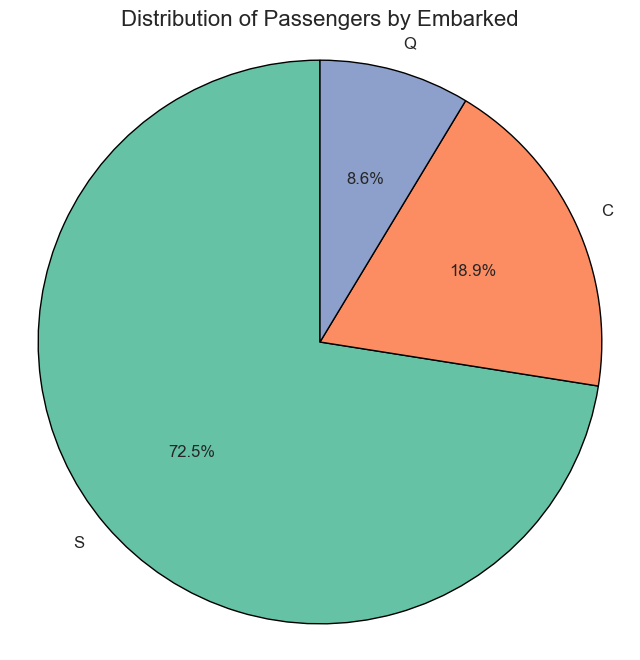

In [15]:
#统计乘客的登船港口分布
embarked_count = data['Embarked'].value_counts()
colors = sns.color_palette("Set2", len(embarked_count)) 
# 绘制饼图
plt.figure(figsize=(8, 8))  # 设置图形大小
plt.pie(embarked_count, labels=embarked_count.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Passengers by Embarked')

plt.axis('equal')
plt.show()

不同年龄段乘客的生存情况

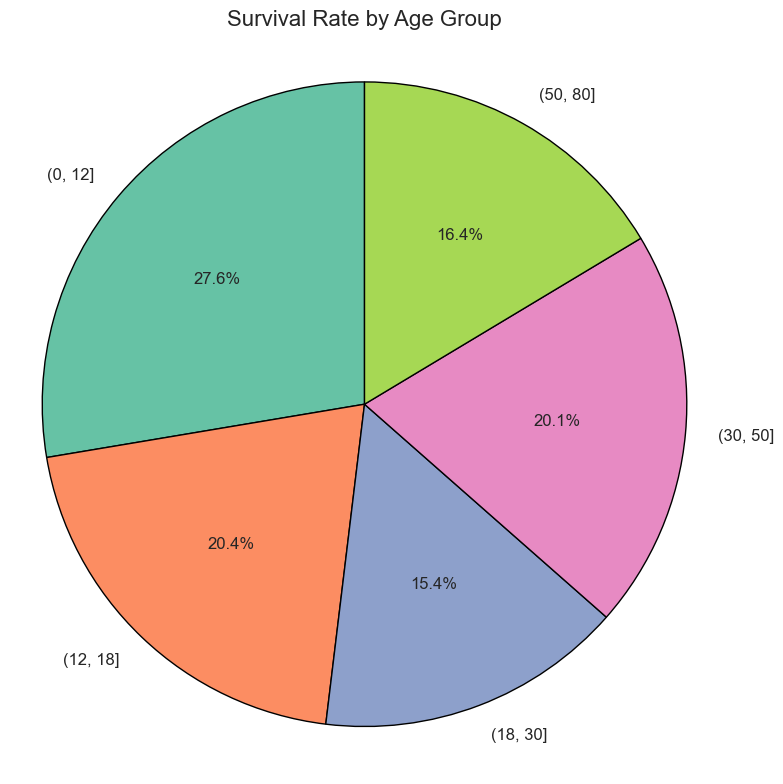

In [16]:
#统计不同年龄段乘客的生存情况
age_groups = pd.cut(data['Age'], bins=[0, 12, 18, 30, 50, 80])
survival_by_age = data.groupby(age_groups, observed=False)['Survived'].mean().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(survival_by_age['Survived'], labels=survival_by_age['Age'].astype(str), autopct='%1.1f%%', 
        startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
plt.title('Survival Rate by Age Group')
plt.axis('equal')
plt.tight_layout()
plt.show()

票价的分布

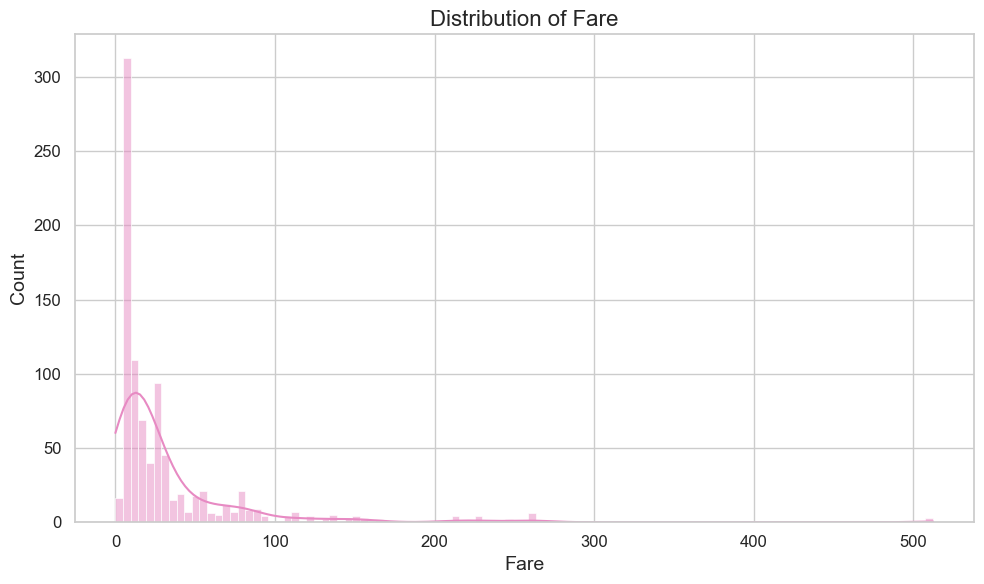

In [17]:
#统计票价的分布
plt.figure()
sns.histplot(data['Fare'], kde=True, color=palette[3])
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

不同票价的生存状况

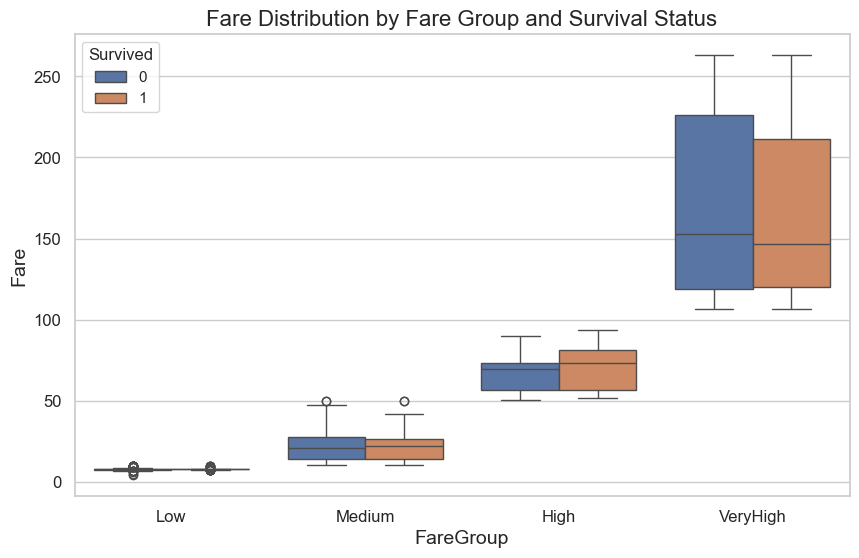

In [18]:
#统计不同票价的生存状况
sns.boxplot(x='FareGroup', y='Fare', hue='Survived', data=data)
plt.title('Fare Distribution by Fare Group and Survival Status')
plt.show()


不同舱位等级的乘客生存率

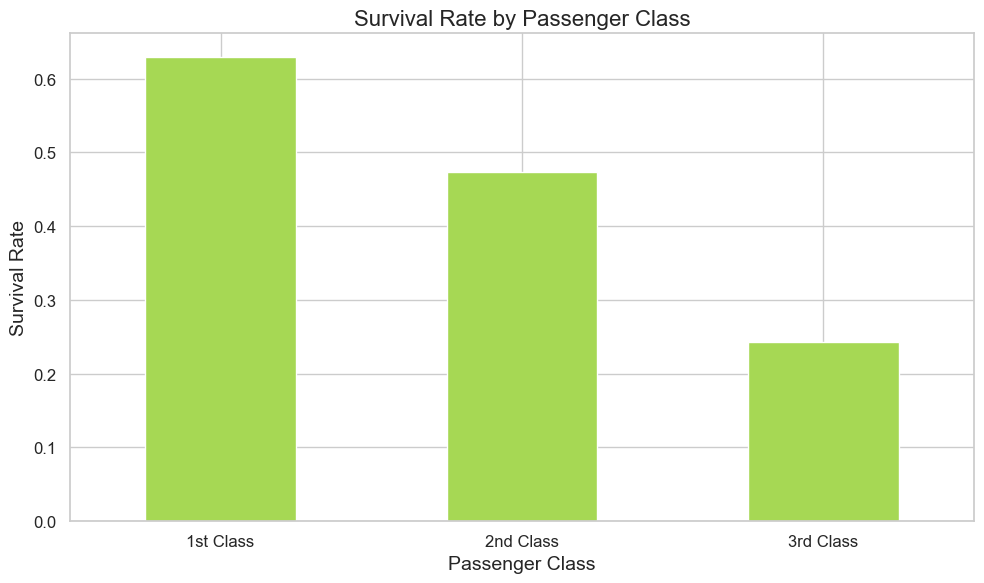

In [19]:
# 统计不同舱位等级的乘客生存率
pclass_survived = data.groupby('Pclass')['Survived'].mean()
plt.figure()
pclass_survived.plot(kind='bar', color=palette[4])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.tight_layout()
plt.show()

不同舱位等级的乘客数量

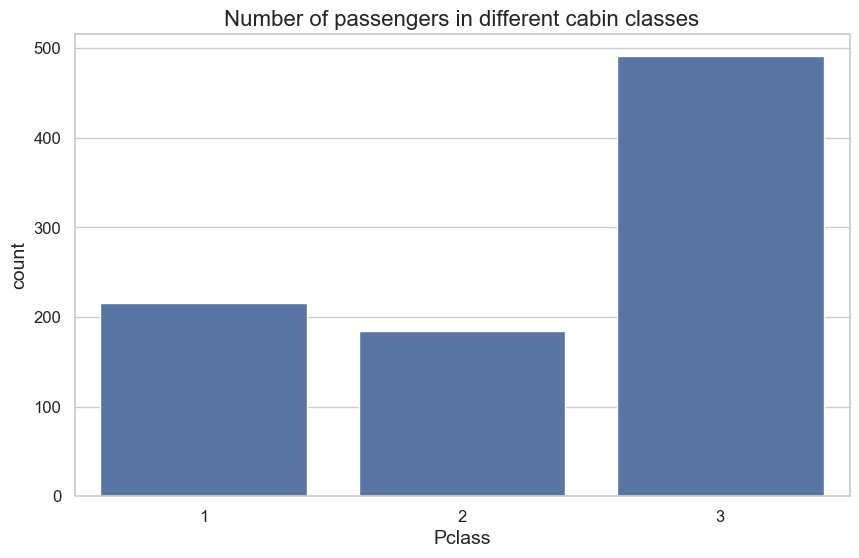

In [20]:
#统计不同舱位等级的乘客数量
sns.countplot(x='Pclass', data=data)
plt.title("Number of passengers in different cabin classes")
plt.show()

不同船舱等级男性女性乘客数量占比

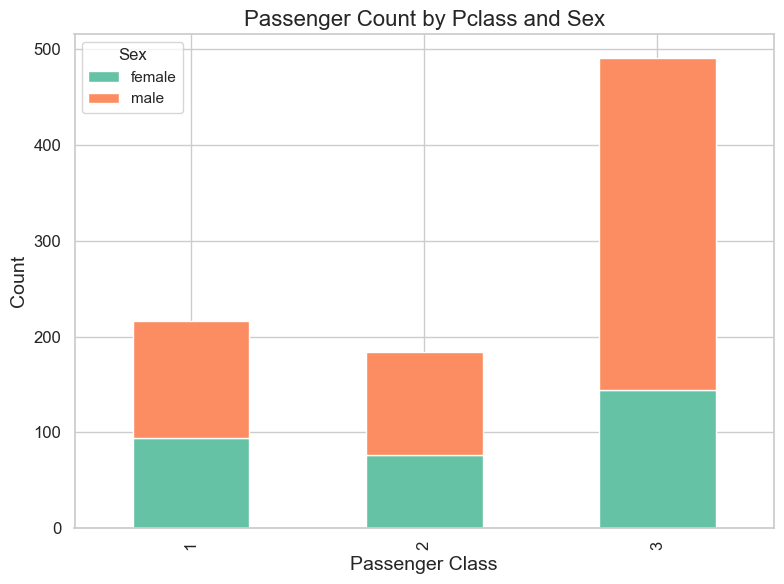

In [21]:
# 统计不同船舱等级下男性和女性乘客数量
gender_counts_by_pclass = data.groupby(['Pclass', 'Sex']).size().unstack()
gender_counts_by_pclass.plot(kind='bar', stacked=True, color=[palette[0], palette[1]], figsize=(8, 6))
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Count by Pclass and Sex')
plt.tight_layout()
plt.show()

存活的男性与女性的平均年龄

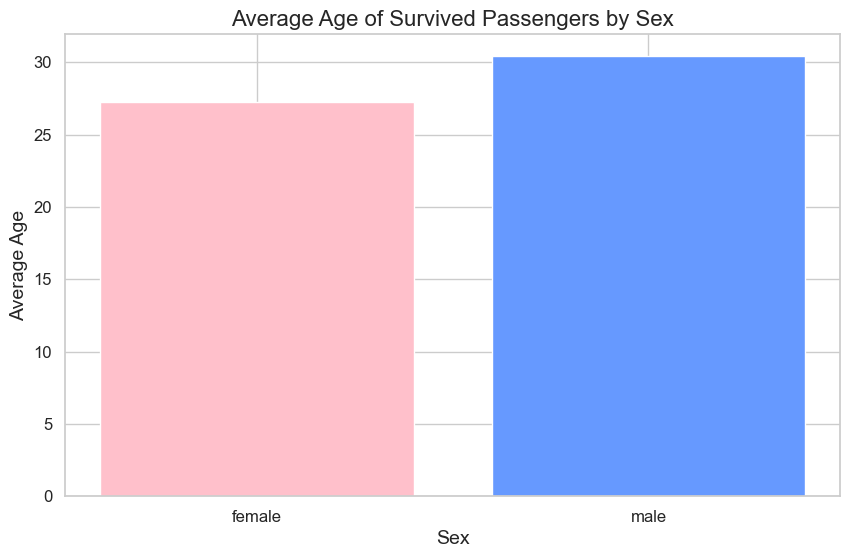

In [22]:
#统计存活的男性与女性的平均年龄
average_age_survived = data.groupby('Sex')['Age'].mean()

# 设置颜色：女性用粉色 男性用蓝色（绝非性别刻板印象QAQ）
colors = ['#6699FF' if sex == 'male' else 'pink' for sex in average_age_survived.index]

# 绘制柱状图显示存活的男性和女性的平均年龄
plt.bar(average_age_survived.index, average_age_survived, color=colors)

plt.xlabel('Sex')
plt.ylabel('Average Age')
plt.title('Average Age of Survived Passengers by Sex')
plt.show()

家庭规模柱状图

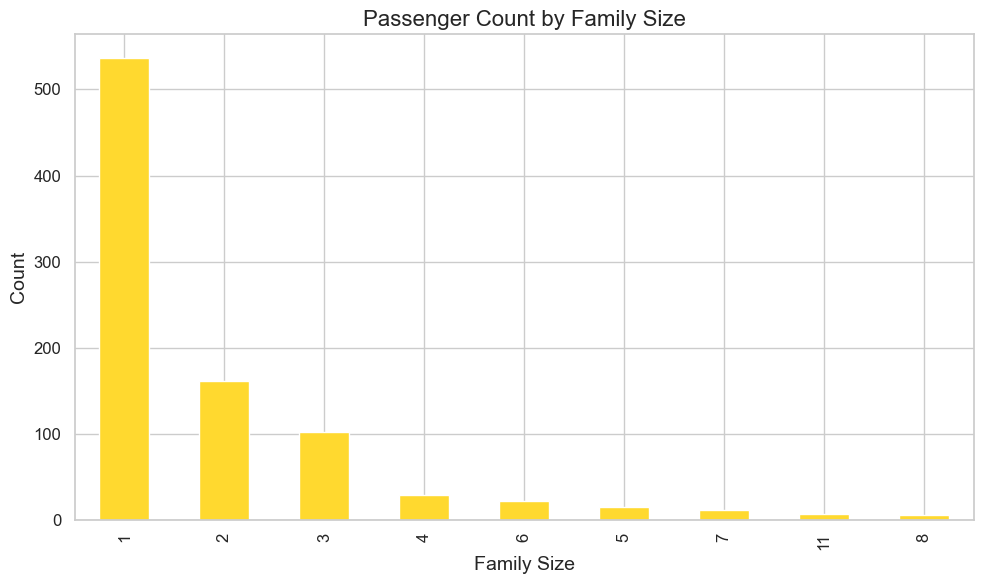

In [23]:
#统计家庭规模
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
passenger_count_by_family_size = data['FamilySize'].value_counts()
plt.figure()
passenger_count_by_family_size.plot(kind='bar', color=palette[5])
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Passenger Count by Family Size')
plt.tight_layout()
plt.show()

生存率与称谓的关系（不同称谓反映不同身份）

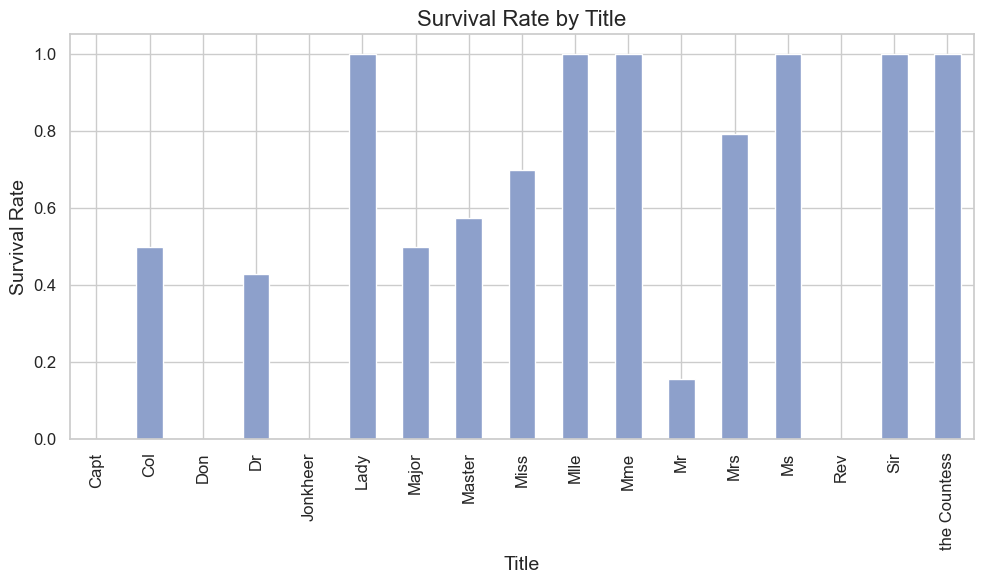

In [24]:
#统计生存率与称谓的关系（不同称谓反映不同身份）
title_survival_rate = data.groupby('Title')['Survived'].mean()
plt.figure()
title_survival_rate.plot(kind='bar', color=palette[2])
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xlabel('Title')
plt.tight_layout()
plt.show()


不同年龄段和船舱等级组合下乘客存活率

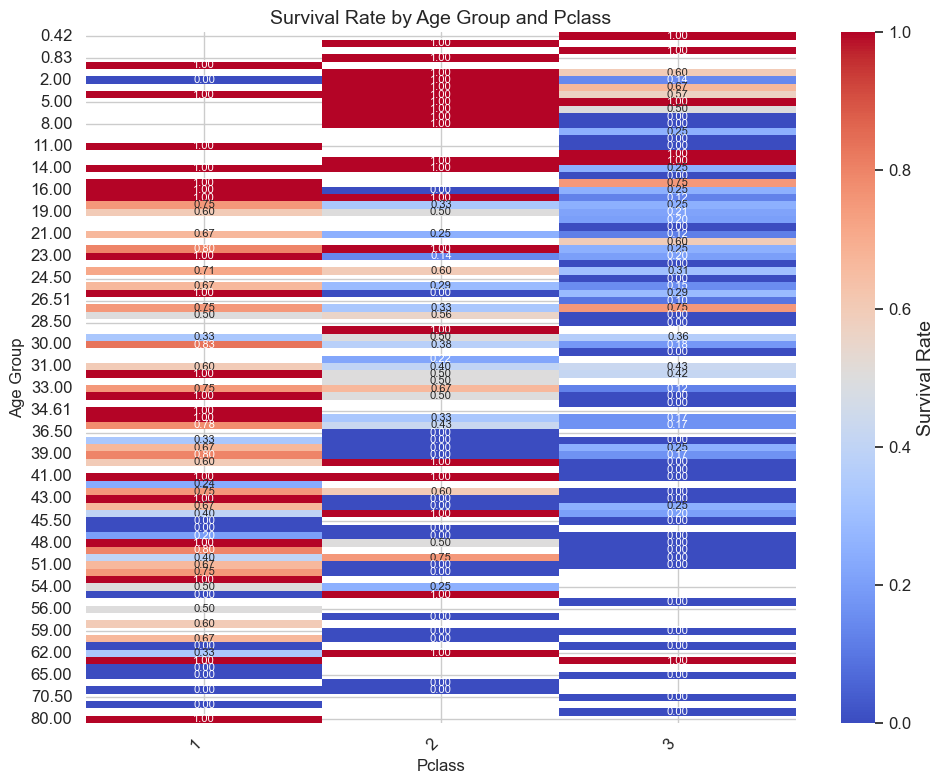

In [32]:
#统计不同年龄段和船舱等级组合下乘客存活状况

# 计算不同年龄段和船舱等级组合下的乘客存活率
survival_rate_by_age_group_pclass = data.groupby(['Age', 'Pclass'])['Survived'].mean().unstack()

# 格式化y轴的标签（即年龄段）
survival_rate_by_age_group_pclass.index = survival_rate_by_age_group_pclass.index.map(lambda x: f'{x:.2f}')

# 调整图形大小
plt.figure(figsize=(10, 8))

# 绘制热力图，调整字体大小、颜色映射和数字显示格式
sns.heatmap(survival_rate_by_age_group_pclass, annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={'size': 8}, cbar_kws={'label': 'Survival Rate'})

# 设置x轴和y轴标签
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Age Group', fontsize=12)

# 设置标题
plt.title('Survival Rate by Age Group and Pclass', fontsize=14)

# 旋转x轴和y轴的刻度标签
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 显示图表
plt.tight_layout()  # 自动调整子图参数，使其填充整个图像区域
plt.show()

Epoch 1/30
23/23 - 1s - 47ms/step - accuracy: 0.6489 - loss: 0.6510 - val_accuracy: 0.8045 - val_loss: 0.5358
Epoch 2/30
23/23 - 0s - 4ms/step - accuracy: 0.7640 - loss: 0.5480 - val_accuracy: 0.7933 - val_loss: 0.4848
Epoch 3/30
23/23 - 0s - 4ms/step - accuracy: 0.7865 - loss: 0.5258 - val_accuracy: 0.8156 - val_loss: 0.4731
Epoch 4/30
23/23 - 0s - 4ms/step - accuracy: 0.8062 - loss: 0.4727 - val_accuracy: 0.8156 - val_loss: 0.4642
Epoch 5/30
23/23 - 0s - 4ms/step - accuracy: 0.8118 - loss: 0.4705 - val_accuracy: 0.8156 - val_loss: 0.4540
Epoch 6/30
23/23 - 0s - 4ms/step - accuracy: 0.8160 - loss: 0.4602 - val_accuracy: 0.8156 - val_loss: 0.4611
Epoch 7/30
23/23 - 0s - 4ms/step - accuracy: 0.8202 - loss: 0.4489 - val_accuracy: 0.8045 - val_loss: 0.4558
Epoch 8/30
23/23 - 0s - 4ms/step - accuracy: 0.8202 - loss: 0.4630 - val_accuracy: 0.7989 - val_loss: 0.4529
Epoch 9/30
23/23 - 0s - 4ms/step - accuracy: 0.8357 - loss: 0.4468 - val_accuracy: 0.8045 - val_loss: 0.4577
Epoch 10/30
23/23 

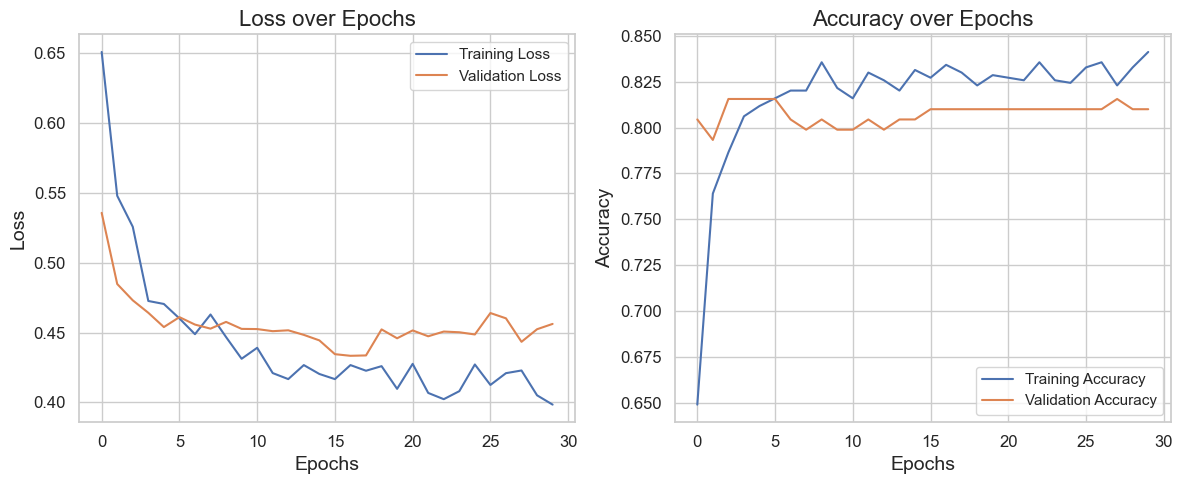

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predictions saved to 'titanic_predictions.csv'


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# 读取训练和测试数据集
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

# 处理缺失值（训练数据）
train_data['Age'] = train_data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))  # 填充Age
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())  # 填充Fare
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])  # 填充Embarked

# 处理缺失值（测试数据）
test_data['Age'] = test_data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))  # 填充Age
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())  # 填充Fare
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])  # 填充Embarked

# 特征工程（训练数据）
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())  # 提取称谓
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1  # 计算家庭大小
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# 特征工程（测试数据）
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())  # 提取称谓
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1  # 计算家庭大小
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# 对类别特征进行独热编码（训练数据）
train_data_encoded = pd.get_dummies(train_data[['Sex', 'Embarked', 'Pclass', 'AgeGroup', 'Title', 'FamilySize']], drop_first=True)

# 目标变量
y_train = train_data['Survived']

# 特征变量
X_train = train_data_encoded

# 对测试数据进行相同的独热编码，但确保列名与训练数据一致
test_data_encoded = pd.get_dummies(test_data[['Sex', 'Embarked', 'Pclass', 'AgeGroup', 'Title', 'FamilySize']], drop_first=True)

# 找出训练集和测试集中的列差异
train_columns = X_train.columns
test_columns = test_data_encoded.columns

# 找出训练集中有，但测试集中没有的列
missing_cols = set(train_columns) - set(test_columns)
# 找出测试集中有，但训练集中没有的列
extra_cols = set(test_columns) - set(train_columns)

# 对测试集补充缺失的列，并设置为0（保证列对齐）
for col in missing_cols:
    test_data_encoded[col] = 0

# 删除测试集中额外的列（保证列对齐）
test_data_encoded = test_data_encoded.drop(columns=extra_cols)

# 确保列的顺序一致
test_data_encoded = test_data_encoded[train_columns]

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_data_encoded)

# 划分训练数据集：80%用于训练，20%用于验证
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# 创建MLP模型
model = Sequential()

# 输入层
model.add(Input(shape=(X_train_split.shape[1],)))

# 隐藏层
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# 输出层
model.add(Dense(1, activation='sigmoid'))  # 使用sigmoid激活函数输出0或1

# 编译模型
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train_split, y_train_split, epochs=30, batch_size=32, validation_data=(X_val_split, y_val_split), verbose=2)

# 评估模型性能
y_pred_train = (model.predict(X_train_split) > 0.5).astype("int32")
y_pred_val = (model.predict(X_val_split) > 0.5).astype("int32")
print("Training Accuracy:", accuracy_score(y_train_split, y_pred_train))
print("Validation Accuracy:", accuracy_score(y_val_split, y_pred_val))

# 绘制训练过程中的损失和准确率
plt.figure(figsize=(12, 5))

# 绘制损失曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 绘制准确率曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 保存训练好的模型
model.save('titanic_mlp_model.keras')

# 使用训练好的模型进行预测
test_predictions = model.predict(X_test_scaled)

# 将预测结果转换为0或1
test_predictions = (test_predictions > 0.5).astype("int32")

# 输出预测结果到CSV文件
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions.flatten()})
output.to_csv('titanic_predictions.csv', index=False)

print("Predictions saved to 'titanic_predictions.csv'")


In [27]:
# 读取实际的生存结果（gender_submission.csv）
gender_submission_path = '../data/gender_submission.csv'
gender_submission = pd.read_csv(gender_submission_path)

# 读取模型的预测结果（titanic_predictions.csv）
predictions_path = 'titanic_predictions.csv'
predictions = pd.read_csv(predictions_path)

# 合并两个数据集，按PassengerId对齐
merged_data = pd.merge(predictions, gender_submission, on='PassengerId')

# 计算准确率
accuracy = accuracy_score(merged_data['Survived_x'], merged_data['Survived_y'])
print(f"Final Accuracy on Test Set: {accuracy:.4f}")

# 用classification_report进行更详细的评估
from sklearn.metrics import classification_report
print(classification_report(merged_data['Survived_x'], merged_data['Survived_y']))


Final Accuracy on Test Set: 0.8900
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       278
           1       0.81      0.88      0.84       140

    accuracy                           0.89       418
   macro avg       0.87      0.89      0.88       418
weighted avg       0.89      0.89      0.89       418

